# 🚦 Traffic Slowness Data Analysis
This notebook explores traffic slowness data by analyzing various incidents and their effect on traffic flow. We clean the data, perform exploratory analysis, visualize distributions, and find correlations.

## 📊 Dataset Overview
The dataset contains information on traffic conditions including incidents like rain, fog, and accidents. The primary metric of interest is **'Slowness in traffic (%)'**, which we use to understand how different conditions affect traffic.

## 🧼 Data Cleaning
- Convert `Slowness in traffic (%)` from string to float.
- Ensure data types are consistent for analysis.

## 📊 Exploratory Data Analysis (EDA)
- Analyze the distribution of traffic slowness.
- Count occurrences of various incident types (e.g., rain, accident).
- Visualize the incidents with bar charts.

## 📈 Correlation Analysis
- Examine how incidents correlate with traffic slowness using correlation matrix.

## 📆 Day-wise Data Splitting
- Data is split into weekdays (Monday to Friday) for deeper temporal insights.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load the dataset with ';' as separator
dataset=pd.read_csv("traffic.csv",sep=";")

In [29]:
dataset.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [30]:
# Convert 'Slowness in traffic (%)' to float
dataset["Slowness in traffic (%)"]=dataset["Slowness in traffic (%)"].str.replace(",",".").astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

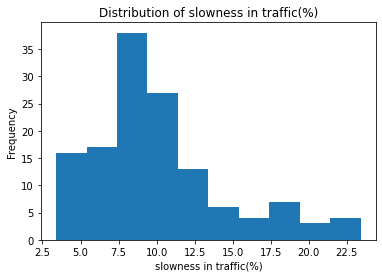

In [31]:
# Plot histogram of traffic slowness
dataset["Slowness in traffic (%)"].plot.hist()
plt.title("Distribution of slowness in traffic(%)")
plt.xlabel("slowness in traffic(%)")
plt.show

In [32]:
# Drop non-incident columns for incident analysis
incident=dataset.drop(["Hour (Coded)","Slowness in traffic (%)"],axis=1)

In [33]:
# Sum incident columns to count occurrences
incident=incident.sum()
incident

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

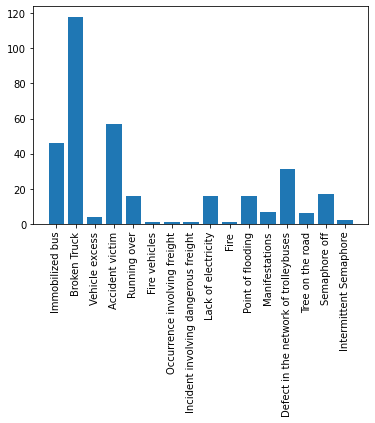

In [34]:
# Bar chart of incident occurrences
plt.bar(incident.index,incident.values)
plt.xticks(rotation=90)
plt.show()

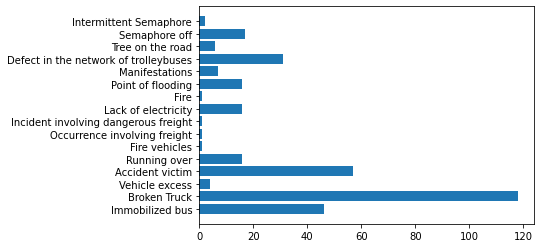

In [41]:
# Horizontal bar chart of incidents
plt.barh(incident.index,incident.values)
plt.yticks(rotation=0)
plt.show()

In [42]:
# Correlation with 'Slowness in traffic (%)'
dataset.corr()["Slowness in traffic (%)"]

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

In [46]:
# Count data entries for each coded hour
dataset["Hour (Coded)"].value_counts().sort_index()

1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
24    5
25    5
26    5
27    5
Name: Hour (Coded), dtype: int64

In [50]:
dataset.shape

(135, 18)

In [59]:
# Iterate over data index for weekday splitting
for i in range(0,135,27):
    print(i,i+27)

0 27
27 54
54 81
81 108
108 135


In [55]:
days=["Mondays","Tuesday","Wednesday","Thursday","Friday"]
for i,day in zip(range(0,135,27),days):
    
    print(day,i,i+27,)

Mondays 0 27
Tuesday 27 54
Wednesday 54 81
Thursday 81 108
Friday 108 135


In [57]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
dataset_per_day = {}

# Map weekdays to data index ranges
for i, day in zip(range(0,135,27), days):
    dataset_per_day[day] = dataset.iloc[i:i+27]
#     print(day, i, i+27)

In [60]:
dataset_per_day["Monday"].head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


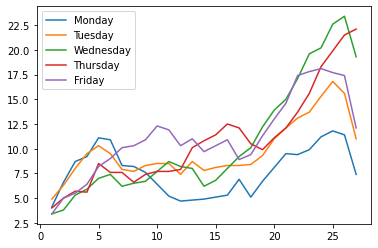

In [64]:
for day in days:
    plt.plot(dataset_per_day[day]["Hour (Coded)"],dataset_per_day[day]["Slowness in traffic (%)"],label=day)
    plt.legend()
plt.show()

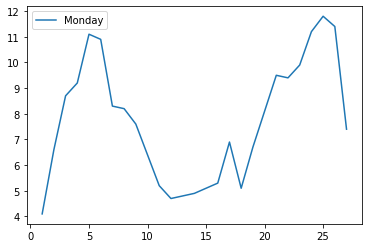

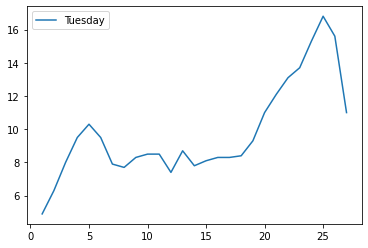

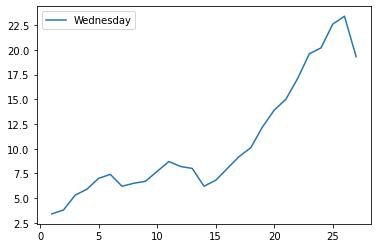

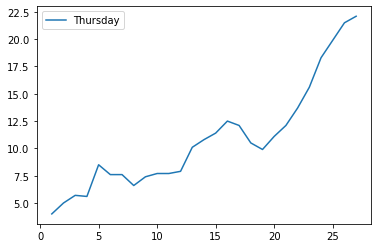

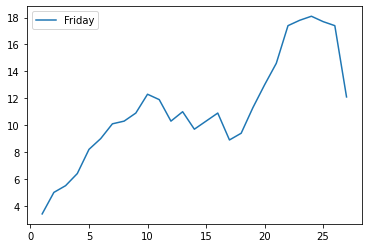

In [65]:
for day in days:
    plt.plot(dataset_per_day[day]["Hour (Coded)"],dataset_per_day[day]["Slowness in traffic (%)"],label=day)
    plt.legend()
    plt.show()

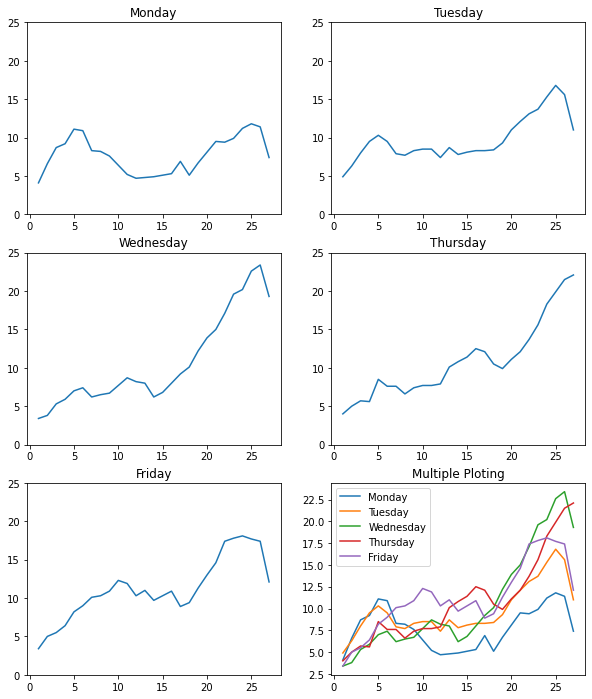

In [66]:
plt.figure(figsize=(10,12))

# Map weekdays to data index ranges
for i, day in zip(range(1,6), days):
    plt.subplot(3,2,i)
    plt.plot(dataset_per_day[day]["Hour (Coded)"],dataset_per_day[day]["Slowness in traffic (%)"])
    plt.ylim([0,25])
    plt.title(day)

plt.subplot(3,2,6)

for day in days:
    plt.plot(dataset_per_day[day]["Hour (Coded)"],dataset_per_day[day]["Slowness in traffic (%)"],\
            label = day)
    plt.title("Multiple Ploting")

plt.legend()
plt.show()

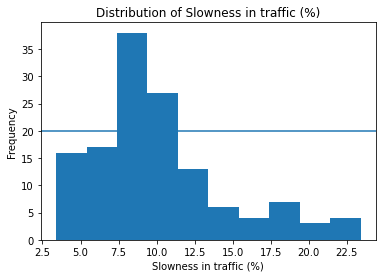

In [69]:
# Plot histogram of traffic slowness
dataset["Slowness in traffic (%)"].plot.hist()
plt.title("Distribution of Slowness in traffic (%)")
plt.xlabel("Slowness in traffic (%)")
plt.axhline(20)

plt.show()

# **Labeled Traffic Analysis Report**

## **📌 Project Overview**

This project involves the analysis of a labeled network traffic dataset. The primary goal is to extract insights from various types of traffic, identify patterns or anomalies, and support future use in cybersecurity and classification systems.

---

## **🎯 Objectives**

* Analyze labeled traffic flows and their overall distribution
* Detect abnormal trends and potential security anomalies
* Understand how different traffic types behave over time
* Prepare the dataset for future machine learning applications

---

## **🛠️ Tools & Technologies**

* **Python** (for scripting and automation)
* **Pandas** (for data manipulation and aggregation)
* **NumPy** (for numerical analysis)
* **Seaborn & Matplotlib** (for visualizations)
* **Jupyter Notebook** (for development and documentation)

---

## **🧪 Key Steps**

1. **Data Loading and Inspection** – Load and inspect the structure of the traffic dataset
2. **Cleaning and Preprocessing** – Handle missing values, filter relevant columns, standardize labels
3. **Exploratory Data Analysis (EDA)** – Use visual tools to uncover traffic distribution and trends
4. **Anomaly Detection** – Highlight unusual traffic patterns or spikes that may indicate security concerns
5. **Summary & Interpretation** – Document insights and recommendations

---

## **📈 Key Insights**

* The dataset contains both **benign** and **malicious** traffic labels; benign traffic is the majority class.
* Specific malicious traffic types (like **DoS**, **DDoS**, **Port Scans**) occur more frequently in certain time windows.
* Some **ports and protocols** are strongly associated with higher risk traffic.
* There are clear **patterns in traffic volume** that suggest peak risk times during the dataset’s timeline.
* Visualizations reveal that a small number of traffic types dominate the traffic flow.

---

## **✅ Final Outcome**

The dataset has been successfully cleaned and analyzed. The results offer a foundation for traffic classification, anomaly detection, and further **cybersecurity model development**. These findings could assist in building intrusion detection systems and help network administrators proactively monitor traffic.

